In [58]:
%matplotlib inline
%matplotlib notebook

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import to_datetime
from scipy import fft

In [60]:
filenames = ['data/189_2014.txt']

raw_data = []
for f in filenames:
    raw_data = np.concatenate((raw_data, np.loadtxt(f, delimiter=',', skiprows=1, dtype=str)))
date_data = np.genfromtxt((i[:-2] if i[-1] == '3' else '' for i in raw_data), delimiter=';', 
                     dtype=[('date', 'U19'), ('height', 'float')])

In [61]:
file = open("data.txt", "w")
beginning = np.datetime64(to_datetime(date_data[0][0], dayfirst=True), 's')
for d in date_data:
    file.writelines([str(np.datetime64(to_datetime(d[0], dayfirst=True), 's'))+';', 
                     str((np.datetime64(to_datetime(d[0], dayfirst=True), 's')
                          -beginning).item().total_seconds())+';', str(d[1])+'\n'])
file.close()

## import

In [62]:
data = np.genfromtxt('data.txt', delimiter=";", usecols = range(1,3))
dates = np.genfromtxt('data.txt', dtype='datetime64[s]', delimiter=";", usecols = range(0,1))

## fix data

In [356]:
fixed_data = np.copy(data)

In [357]:
fixed_data = np.copy(data)
for i, index in enumerate(np.nditer(np.where(data[1:,0]-data[:-1,0] != 600))):
    fixed_data = np.insert(fixed_data, index + i + 1, [data[index, 0] + 600, data[index, 1] + (data[index + 1, 1]-data[index, 1])/2], axis=0)

<IPython.core.display.Javascript object>


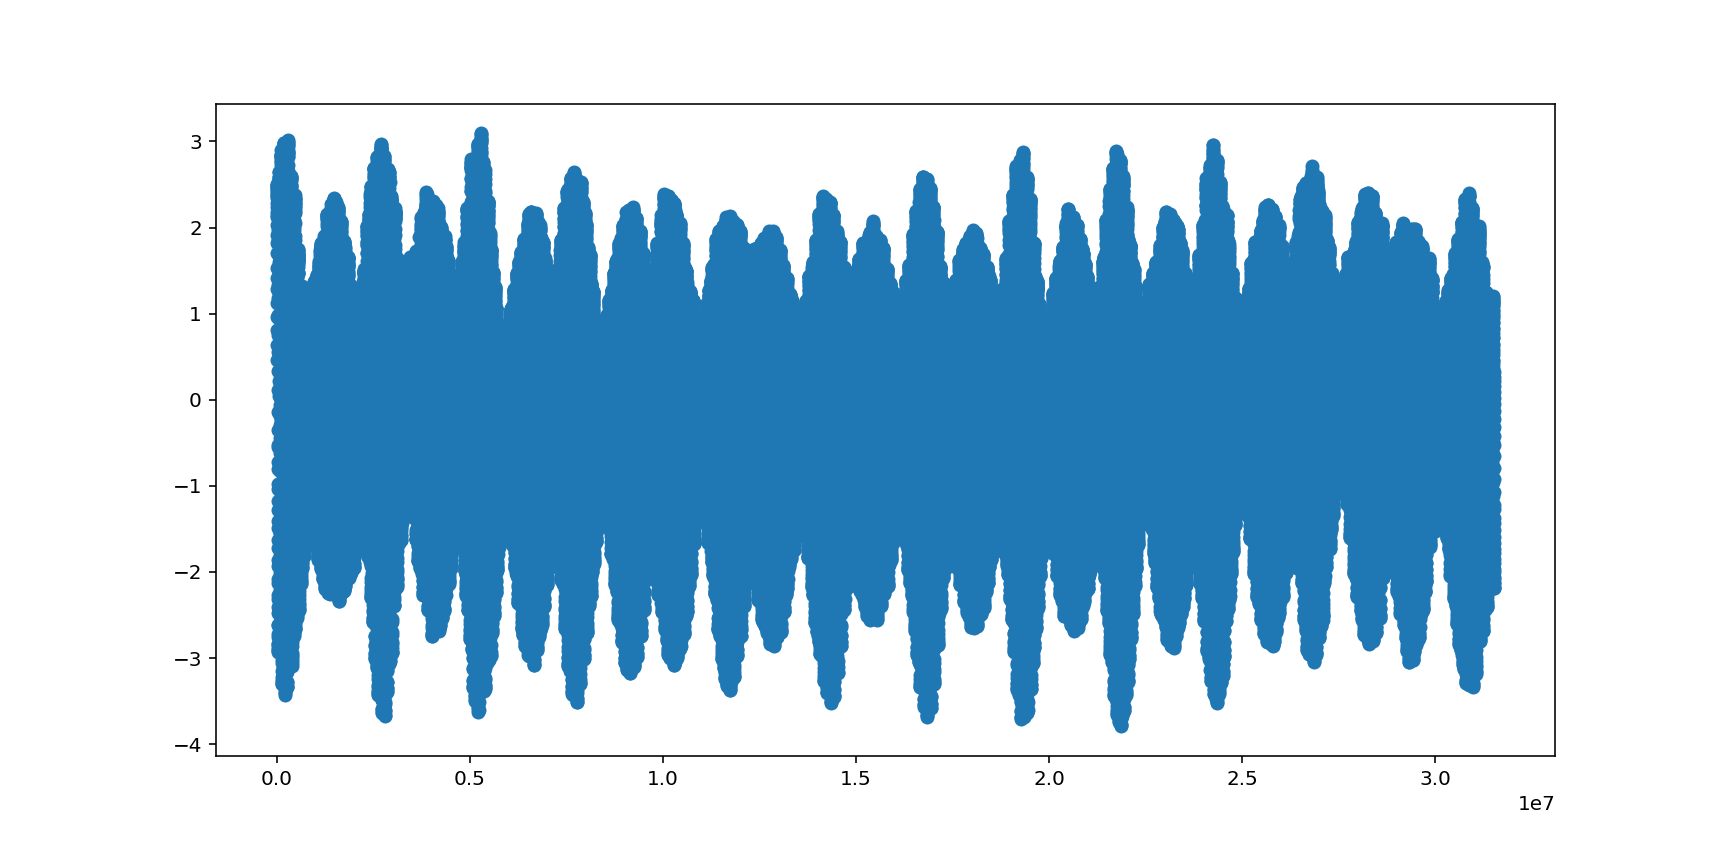

In [407]:
plt.rcParams["figure.figsize"] = (12,6)
period = (6*60 + 12) * 60
offset = 12000
mean_height = np.mean(fixed_data[:,1])

n = len(data)

x = fixed_data[:n, 0]
y = fixed_data[:n, 1] - mean_height

T = 600

fig, ax = plt.subplots()
ax.scatter(x, y)

<IPython.core.display.Javascript object>


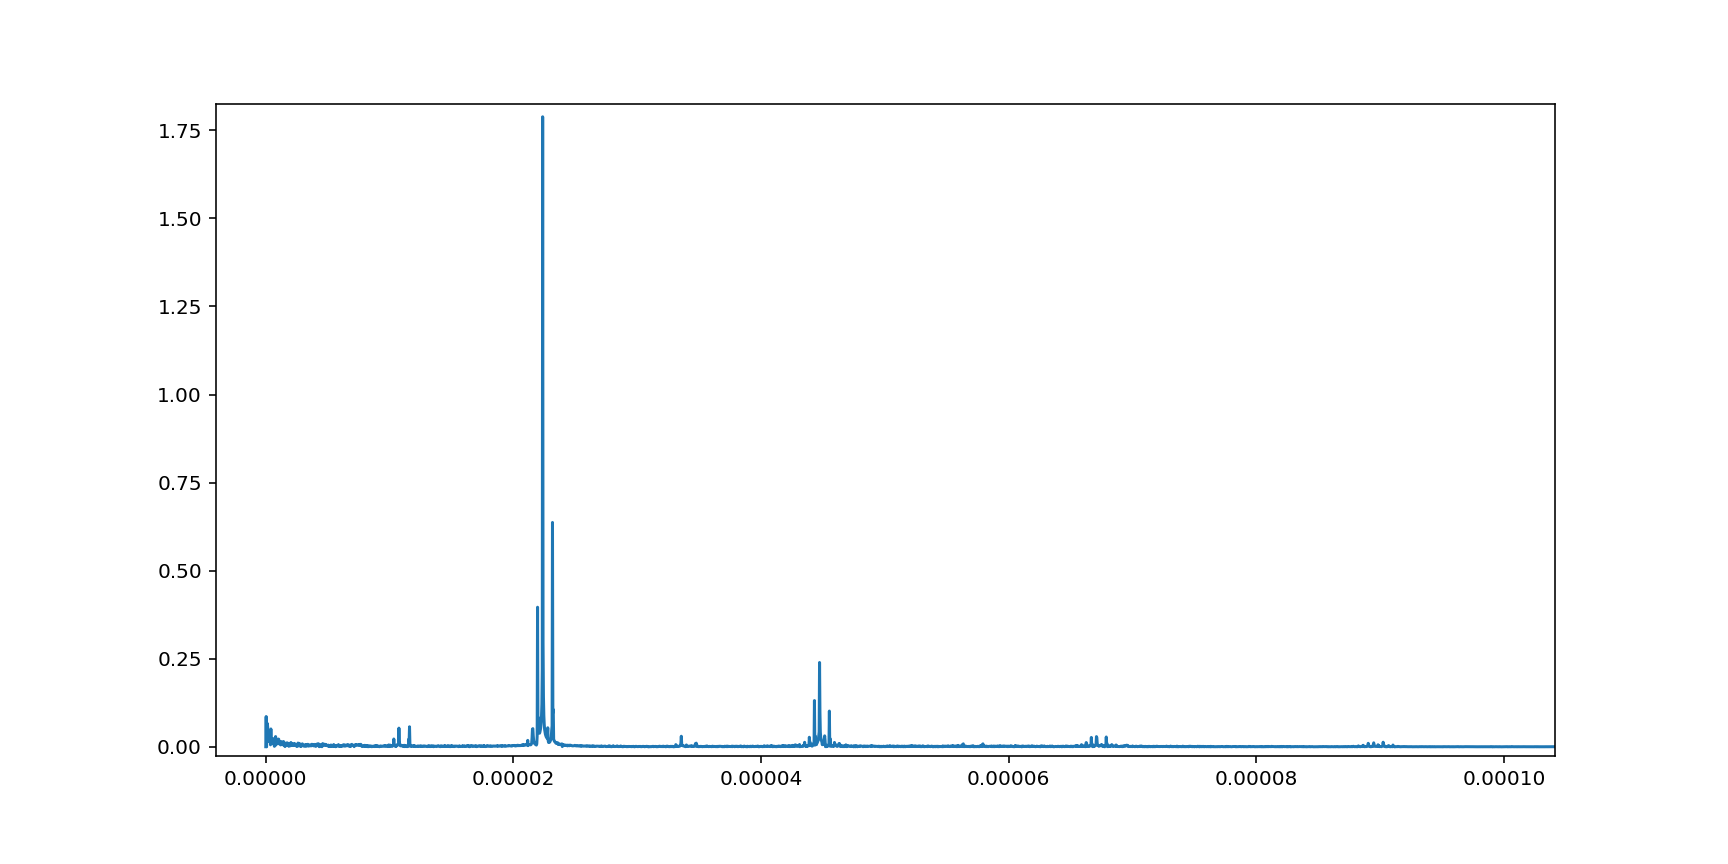

In [413]:
yf = fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
Ck = 2/n * yf
aC = abs(Ck)

fig, ax = plt.subplots()
ax.plot(xf, aC[:n//2])

In [532]:
a = 0.25
osz =  np.column_stack((xf[1:][aC[1:n//2] > a], aC[1:n//2][aC[1:n//2] > a]))
osz = osz[(-osz[:,1]).argsort()]
omega = 2*np.pi*osz[:,0]
print(len(osz))

4


<IPython.core.display.Javascript object>


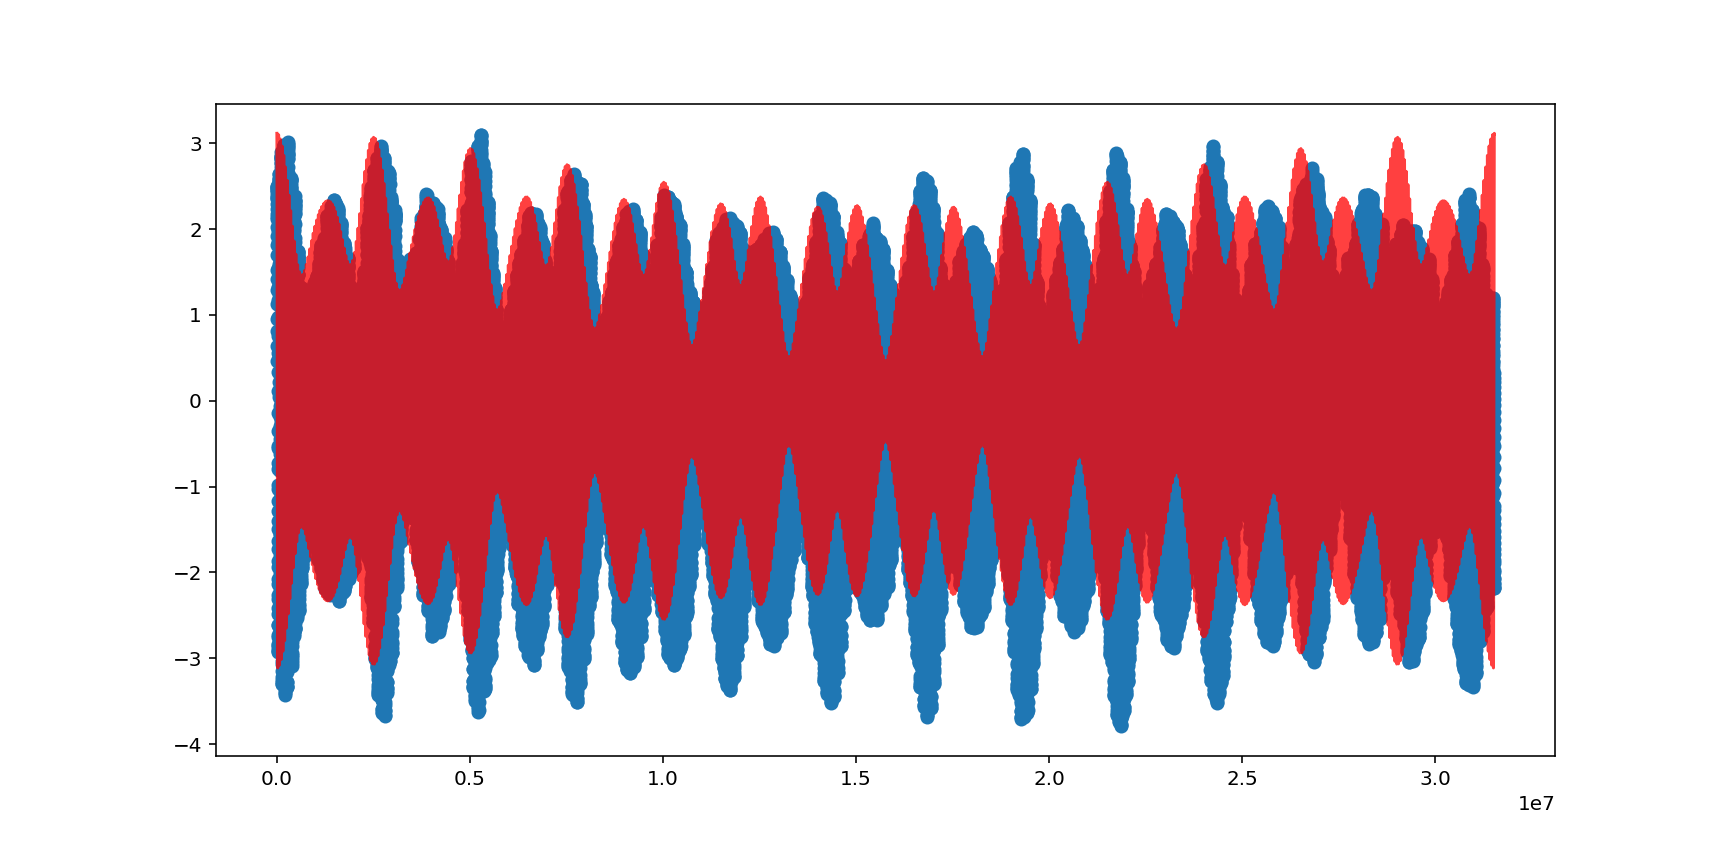

In [533]:
fig, ax = plt.subplots()
ax.scatter(x, y, zorder=0)
lin_x = np.linspace(0, x[-1], int(1E6))
func = np.zeros_like(lin_x)
for i, o in enumerate(osz):
    func += o[1]*np.cos(omega[i]*lin_x)

ax.plot(lin_x, func, zorder=1, color='r', alpha=0.75)

## Fourier is fun